# Network Intrusion Detection using Machine Learning

## Importing Libraries

In [1]:
pip install numpy pandas matplotlib scikit-learn seaborn imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
pd.set_option('display.max_columns', None)

np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

print("pandas : {0}".format(pd.__version__))
print("numpy : {0}".format(np.__version__))
print("matplotlib : {0}".format(matplotlib.__version__))
print("seaborn : {0}".format(sns.__version__))
print("sklearn : {0}".format(sklearn.__version__))
print("imblearn : {0}".format(imblearn.__version__))

pandas : 2.2.3
numpy : 2.2.2
matplotlib : 3.10.0
seaborn : 0.13.2
sklearn : 1.6.1
imblearn : 0.13.0


## Loading the data

In [3]:
# Dataset field names
datacols = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes",
    "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in",
    "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations",
    "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login",
    "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate",
    "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate",
    "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
    "dst_host_same_srv_rate", "dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate",
    "dst_host_serror_rate", "dst_host_srv_serror_rate",
    "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label", "difficulty_level"
]


In [4]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd

# Load the datasets
dfkdd_train = pd.read_csv('KDDTrain.txt')
dfkdd_test = pd.read_csv('KDDTest.txt')

# Display the first few rows of the datasets
print("Training Data:")
print(dfkdd_train.head())

print("\nTesting Data:")
print(dfkdd_test.head())

Training Data:
   0  tcp ftp_data   SF  491   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  \
0  0  udp    other   SF  146     0    0    0    0    0    0    0    0    0   
1  0  tcp  private   S0    0     0    0    0    0    0    0    0    0    0   
2  0  tcp     http   SF  232  8153    0    0    0    0    0    1    0    0   
3  0  tcp     http   SF  199   420    0    0    0    0    0    1    0    0   
4  0  tcp  private  REJ    0     0    0    0    0    0    0    0    0    0   

   0.10  0.11  0.12  0.13  0.14  0.15  0.16  0.18    2  2.1  0.00  0.00.1  \
0     0     0     0     0     0     0     0     0   13    1   0.0     0.0   
1     0     0     0     0     0     0     0     0  123    6   1.0     1.0   
2     0     0     0     0     0     0     0     0    5    5   0.2     0.2   
3     0     0     0     0     0     0     0     0   30   32   0.0     0.0   
4     0     0     0     0     0     0     0     0  121   19   0.0     0.0   

   0.00.2  0.00.3  1.00  0.00.4  0.00.5  150   25  0.

In [6]:
# dataset’s documentation
with open("KDDTrain.txt", "r") as file:
    for _ in range(5):
        print(file.readline())

0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.00,0.00,0.00,0.00,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20

0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.00,0.00,0.00,0.00,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15

0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.00,1.00,0.00,0.00,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19

0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.20,0.20,0.00,0.00,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21

0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.00,0.00,0.00,0.00,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21



In [7]:
# Load NSL-KDD train dataset
dfkdd_train = pd.read_csv("KDDTrain.txt", sep=",", names=datacols)

# Load NSL-KDD test dataset
dfkdd_test = pd.read_csv("KDDTest.txt", sep=",", names=datacols)

# Drop the last column ('difficulty_level'), as it's not needed
dfkdd_train = dfkdd_train.iloc[:, :-1]
dfkdd_test = dfkdd_test.iloc[:, :-1]

## Train Dataset

In [8]:
# View train data
dfkdd_train.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.0,150,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.0,255,1,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.0,255,26,0.10,0.05,0.00,0.0,1.0,1.0,0.00,0.0,neptune


In [9]:
# train set dimension
print('Train set dimension: {} rows, {} columns'.format(dfkdd_train.shape[0], dfkdd_train.shape[1]))

Train set dimension: 125973 rows, 42 columns


## Test Dataset

In [10]:
# View test data
dfkdd_test.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.0,1.0,1.0,0.04,0.06,0.0,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.0,1.0,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.0,1.0,1.0,0.01,0.06,0.0,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.0,1.0,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.0,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.0,0.0,normal


In [11]:
# test set dimension
print('Test set dimension: {} rows, {} columns'.format(dfkdd_test.shape[0], dfkdd_test.shape[1]))

Test set dimension: 22544 rows, 42 columns


## Data Preprocessing

### Mapping attack field to attack class 

In [12]:
mapping = {'ipsweep': 'Probe','satan': 'Probe','nmap': 'Probe','portsweep': 'Probe','saint': 'Probe','mscan': 'Probe',
        'teardrop': 'DoS','pod': 'DoS','land': 'DoS','back': 'DoS','neptune': 'DoS','smurf': 'DoS','mailbomb': 'DoS',
        'udpstorm': 'DoS','apache2': 'DoS','processtable': 'DoS',
        'perl': 'U2R','loadmodule': 'U2R','rootkit': 'U2R','buffer_overflow': 'U2R','xterm': 'U2R','ps': 'U2R',
        'sqlattack': 'U2R','httptunnel': 'U2R',
        'ftp_write': 'R2L','phf': 'R2L','guess_passwd': 'R2L','warezmaster': 'R2L','warezclient': 'R2L','imap': 'R2L',
        'spy': 'R2L','multihop': 'R2L','named': 'R2L','snmpguess': 'R2L','worm': 'R2L','snmpgetattack': 'R2L',
        'xsnoop': 'R2L','xlock': 'R2L','sendmail': 'R2L',
        'normal': 'Normal'
        }

In [13]:
# Apply attack class mappings to the dataset
#label is attact column's name
dfkdd_train['attack_class'] = dfkdd_train['label'].apply(lambda v: mapping[v])
dfkdd_test['attack_class'] = dfkdd_test['label'].apply(lambda v: mapping[v])

In [14]:
print(dfkdd_train.columns)
print(dfkdd_test.columns)


Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label', 'attack_class'],
      dtype='object')
Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
  

In [15]:
# Drop the 'label' column only if it exists
if 'label' in dfkdd_train.columns:
    dfkdd_train.drop(['label'], axis=1, inplace=True)

if 'label' in dfkdd_test.columns:
    dfkdd_test.drop(['label'], axis=1, inplace=True)



In [16]:
# View top 3 train data 
dfkdd_train.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.0,150,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,Normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.0,255,1,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.0,255,26,0.10,0.05,0.00,0.0,1.0,1.0,0.00,0.0,DoS


### Exploratory Data Analysis

In [17]:
# Descriptive statistics
dfkdd_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.0,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,0.001342,0.001103,0.302192,0.012669,0.000413,0.004096,0.0,0.000008,0.009423,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,0.036603,0.045154,24.399618,0.483935,0.022181,0.099370,0.0,0.002817,0.096612,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
dfkdd_train['num_outbound_cmds'].value_counts()

num_outbound_cmds
0    125973
Name: count, dtype: int64

In [19]:
dfkdd_test['num_outbound_cmds'].value_counts()

num_outbound_cmds
0    22544
Name: count, dtype: int64

In [20]:
dfkdd_train.drop(['num_outbound_cmds'], axis=1, inplace=True)
dfkdd_test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [21]:
# Attack Class Distribution
attack_class_freq_train = dfkdd_train[['attack_class']].apply(lambda x: x.value_counts())
attack_class_freq_test = dfkdd_test[['attack_class']].apply(lambda x: x.value_counts())
attack_class_freq_train['frequency_percent_train'] = round((100 * attack_class_freq_train / attack_class_freq_train.sum()),2)
attack_class_freq_test['frequency_percent_test'] = round((100 * attack_class_freq_test / attack_class_freq_test.sum()),2)

attack_class_dist = pd.concat([attack_class_freq_train,attack_class_freq_test], axis=1) 
attack_class_dist

,attack_class,frequency_percent_train,attack_class,frequency_percent_test
attack_class,,,,
Normal,67343,53.46,9711,43.08
DoS,45927,36.46,7458,33.08
Probe,11656,9.25,2421,10.74
R2L,995,0.79,2754,12.22
U2R,52,0.04,200,0.89


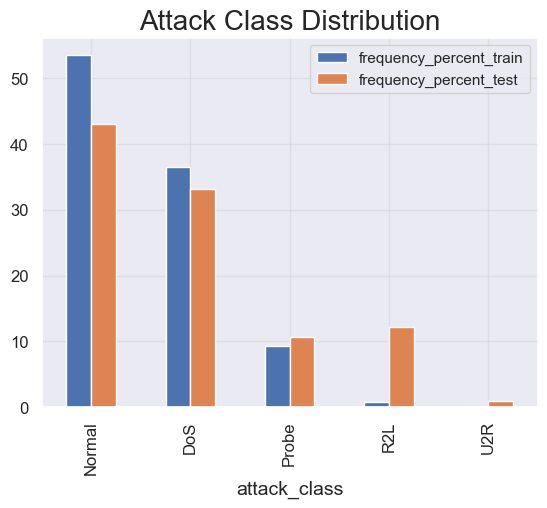

In [22]:
# Attack class bar plot
plot = attack_class_dist[['frequency_percent_train', 'frequency_percent_test']].plot(kind="bar");
plot.set_title("Attack Class Distribution", fontsize=20);
plot.grid(color='lightgray', alpha=0.5);


In [23]:
dfkdd_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,Normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Normal


### Scaling Numerical Features

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = dfkdd_train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(dfkdd_train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(dfkdd_test.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframes
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

### Encoding Categorical Attributes

In [25]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# extract categorical attributes from both training and test sets 
cattrain = dfkdd_train.select_dtypes(include=['object']).copy()
cattest = dfkdd_test.select_dtypes(include=['object']).copy()

# encode the categorical attributes
traincat = cattrain.apply(encoder.fit_transform)
testcat = cattest.apply(encoder.fit_transform)

# separate target column from encoded data 
enctrain = traincat.drop(['attack_class'], axis=1)
enctest = testcat.drop(['attack_class'], axis=1)

cat_Ytrain = traincat[['attack_class']].copy()
cat_Ytest = testcat[['attack_class']].copy()

## Data Sampling

In [ ]:

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Ensure categorical features are one-hot encoded (replace this with your actual encoding step)
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')
encoded_features = encoder.fit_transform(dfkdd_train[['protocol_type', 'service', 'flag']]).toarray()
enctrain = pd.DataFrame(encoded_features)

# Select numerical columns from train set
sc_traindf = dfkdd_train.select_dtypes(include=['float64', 'int64'])

# Combine numerical and encoded categorical features
refclass = np.concatenate((sc_traindf.values, enctrain.values), axis=1)
X = refclass

# Reshape target column to 1D array //cat_Ytest is attack class
y_test = cat_Ytest.values.reshape(-1,)
y = cat_Ytrain.values.reshape(-1,)

# Apply the random over-sampling
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))


Original dataset shape Counter({np.int64(1): 67343, np.int64(0): 45927, np.int64(2): 11656, np.int64(3): 995, np.int64(4): 52})
Resampled dataset shape Counter({np.int64(1): 67343, np.int64(0): 67343, np.int64(3): 67343, np.int64(2): 67343, np.int64(4): 67343})


## Feature Selection

Length of refclasscol: 121
Length of score: 121


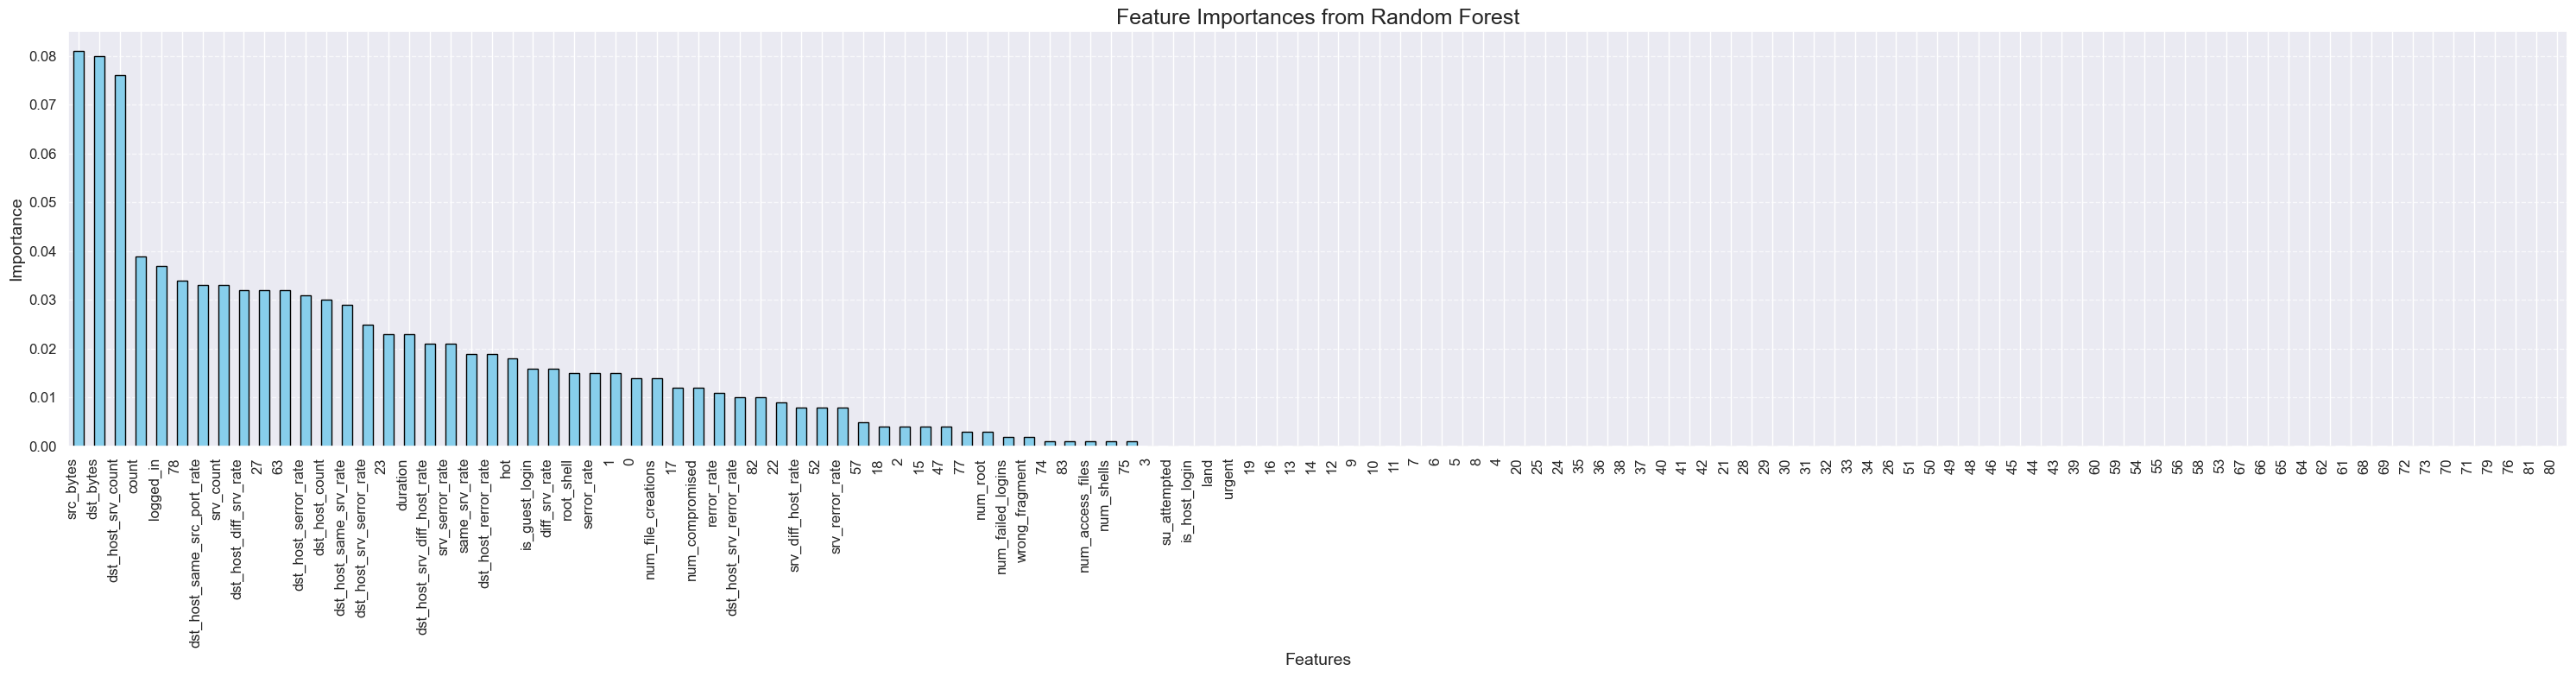

In [ ]:
#Feature Importance from Random Forest
from sklearn.ensemble import RandomForestClassifier
# Define refclasscol properly based on the features used for training
# Combine numerical features and one-hot encoded categorical features
refclasscol = list(sc_traindf.columns) + list(enctrain.columns)

# Train Random Forest
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_res, y_res)

# Extract important features (feature importances)
score = np.round(rfc.feature_importances_, 3)

# Check the lengths of refclasscol and score to debug the issue
print("Length of refclasscol:", len(refclasscol))
print("Length of score:", len(score))

# Ensure the lengths match before proceeding
if len(refclasscol) == len(score):
    importances = pd.DataFrame({'feature': refclasscol, 'importance': score})
    importances = importances.sort_values('importance', ascending=False).set_index('feature')

    # Plot feature importances in a more beautiful way
    plt.rcParams['figure.figsize'] = (30, 8)  # Increase figure size for better readability
    importances.plot.bar(color='skyblue', edgecolor='black', legend=False)  # Bar chart with color and edges
    plt.title('Feature Importances from Random Forest', fontsize=18)  # Title with larger font size
    plt.xlabel('Features', fontsize=14)  # X-axis label with font size
    plt.ylabel('Importance', fontsize=14)  # Y-axis label with font size
    plt.xticks(rotation=90, ha='right', fontsize=12)  # Rotate feature names and adjust alignment
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Horizontal grid lines
    plt.show()
else:
    print("Mismatch in the number of features and importance values.")


In [ ]:
#Recursive Feature Elimination (RFE) with Random Forest
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Ensure X_res and y_res are NumPy arrays
X_res = np.array(X_res)
y_res = np.array(y_res)

# Convert refclasscol elements to strings and filter non-numeric names
valid_feature_names = [str(col) for col in refclasscol if not str(col).isdigit()]
valid_feature_names = np.array(valid_feature_names)  # Convert to NumPy array

# Debugging: Check filtered feature names
print("Filtered Feature Names:", valid_feature_names)

# Train a RandomForest model
model = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
model.fit(X_res, y_res)

# Get feature importances and select the top 10 most important features
top_indices = np.argsort(model.feature_importances_)[-10:]  # Get indices of top 10 features

# Ensure top_indices are within bounds of valid_feature_names
if max(top_indices) >= len(valid_feature_names):
    print("Warning: Some selected indices are out of valid feature names range!")
    top_indices = top_indices[top_indices < len(valid_feature_names)]  # Filter invalid indices

# Get the selected feature names
selected_features = valid_feature_names[top_indices]

# Print the selected features
print("Selected Features:", selected_features)


Filtered Feature Names: ['duration' 'src_bytes' 'dst_bytes' 'land' 'wrong_fragment' 'urgent' 'hot'
 'num_failed_logins' 'logged_in' 'num_compromised' 'root_shell'
 'su_attempted' 'num_root' 'num_file_creations' 'num_shells'
 'num_access_files' 'is_host_login' 'is_guest_login' 'count' 'srv_count'
 'serror_rate' 'srv_serror_rate' 'rerror_rate' 'srv_rerror_rate'
 'same_srv_rate' 'diff_srv_rate' 'srv_diff_host_rate' 'dst_host_count'
 'dst_host_srv_count' 'dst_host_same_srv_rate' 'dst_host_diff_srv_rate'
 'dst_host_same_src_port_rate' 'dst_host_srv_diff_host_rate'
 'dst_host_serror_rate' 'dst_host_srv_serror_rate' 'dst_host_rerror_rate'
 'dst_host_srv_rerror_rate']
Selected Features: ['srv_count' 'logged_in' 'count' 'dst_host_serror_rate'
 'dst_host_srv_count' 'dst_bytes' 'src_bytes']


## Dataset Partition

In [29]:
# define columns to new dataframe
newcol = list(refclasscol)
newcol.append('attack_class')

# add a dimension to target
new_y_res = y_res[:, np.newaxis]

# create a dataframe from sampled data
res_arr = np.concatenate((X_res, new_y_res), axis=1)
res_df = pd.DataFrame(res_arr, columns = newcol) 

# create test dataframe
reftest = pd.concat([sc_testdf, testcat], axis=1)
reftest['attack_class'] = reftest['attack_class'].astype(np.float64)
reftest['protocol_type'] = reftest['protocol_type'].astype(np.float64)
reftest['flag'] = reftest['flag'].astype(np.float64)
reftest['service'] = reftest['service'].astype(np.float64)

res_df.shape


(336715, 122)

In [30]:
reftest.shape

(22544, 41)

In [32]:
# Subdividing the dataset into binary classification sets
from collections import defaultdict
classdict = defaultdict(list)

# create two-target classes (normal class and an attack class)  
attacklist = [('DoS', 0.0), ('Probe', 2.0), ('R2L', 3.0), ('U2R', 4.0)]
normalclass = [('Normal', 1.0)]

def create_classdict():
    '''This function subdivides train and test dataset into two-class attack labels''' 
    for j, k in normalclass: 
        for i, v in attacklist: 
            restrain_set = res_df.loc[(res_df['attack_class'] == k) | (res_df['attack_class'] == v)]
            classdict[j +'_' + i].append(restrain_set)
            # test labels
            reftest_set = reftest.loc[(reftest['attack_class'] == k) | (reftest['attack_class'] == v)]
            classdict[j +'_' + i].append(reftest_set)
        
create_classdict()

In [33]:
for k, v in classdict.items():
    print(k)

Normal_DoS
Normal_Probe
Normal_R2L
Normal_U2R


In [34]:
pretrain = classdict['Normal_DoS'][0]
pretest = classdict['Normal_DoS'][1]
grpclass = 'Normal_DoS'

## Finalize data preprocessing for training

In [35]:
import numpy as np

# Select only numerical features (remove 'service' if present in the list)
available_features = [col for col in selected_features if col in pretrain.columns]


# Extract numerical features
X_train = pretrain[available_features].values
X_test = pretest[available_features].values

# Extract target variable
y_train = pretrain[['attack_class']].values.squeeze()
y_test = pretest[['attack_class']].values.squeeze()

# Print dataset shape
print("✅ X_train Shape:", X_train.shape)
print("✅ X_test Shape:", X_test.shape)
print("✅ Y_train Shape:", y_train.shape)
print("✅ Y_test Shape:", y_test.shape)

✅ X_train Shape: (134686, 7)
✅ X_test Shape: (17169, 7)
✅ Y_train Shape: (134686,)
✅ Y_test Shape: (17169,)


##  Training Multiple Machine Learning Models

In [36]:
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, y_train)

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, y_train)

# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, y_train)

# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, y_train);

## Evaluating Models


============================== Normal_DoS Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9304455888686343

Model Accuracy:
 0.9304530537695084

Confusion matrix:
 [[61612  5731]
 [ 3636 63707]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.94      0.91      0.93     67343
         1.0       0.92      0.95      0.93     67343

    accuracy                           0.93    134686
   macro avg       0.93      0.93      0.93    134686
weighted avg       0.93      0.93      0.93    134686



============================== Normal_DoS Decision Tree Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9996510455991487

Model Accuracy:
 0.999910903880136

Confusion matrix:
 [[67339     4]
 [    8 67335]]

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     67343
         

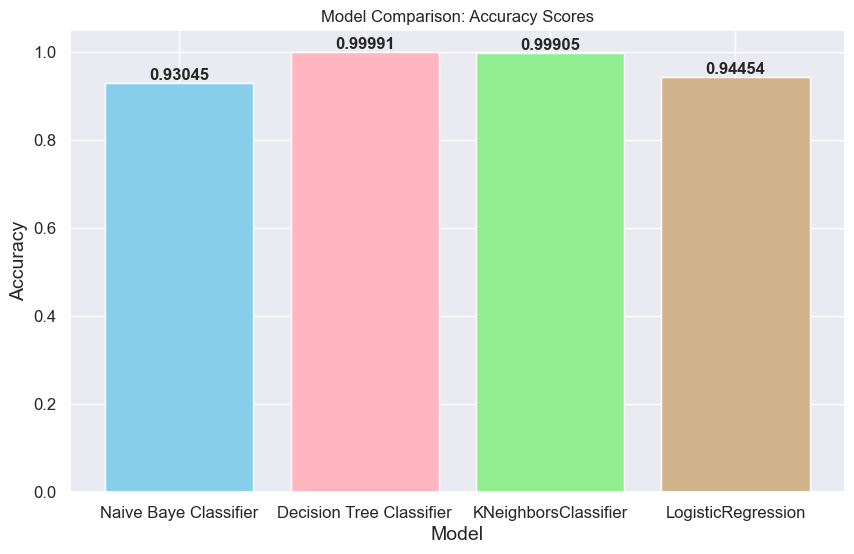

In [37]:
# Evaluates models using cross-validation on the training set to estimate general performance.

from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Store model names and classifiers
models = []
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))

accuracies = []  # List to store accuracy scores

# Define colors for the bars
colors = ['#87CEEB', '#FFB6C1', '#90EE90', '#D2B48C']

# Iterate over models
for i, v in models:
    scores = cross_val_score(v, X_train, y_train, cv=10)
    accuracy = metrics.accuracy_score(y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(y_train, v.predict(X_train))
    classification = metrics.classification_report(y_train, v.predict(X_train))

    # Print evaluation metrics
    print()
    print('============================== {} {} Model Evaluation =============================='.format(grpclass, i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification)
    print()

    # Append accuracy score to the list for plotting
    accuracies.append(accuracy)

# Plot bar graph
plt.figure(figsize=(10, 6))
model_names = [model[0] for model in models]
bars = plt.bar(model_names, accuracies, color=colors)

# Add accuracy values above bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{acc:.5f}", 
             ha='center', va='bottom', fontsize=12, fontweight='bold')
    
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy Scores')
plt.show()

# TN    FP
# FN    TP


Model	                    Accuracy (%)	Precision	Recall	F1-score
Bernoulli Naive Bayes	        93.04	    0.94	    0.91	0.93
Decision Tree Classifier	    99.99	    1.0	        1.0	    1.0
K-Nearest Neighbors	            99.90	    1.0	        1.0	    1.0
Logistic Regression	            94.45	    0.97	    0.92	0.94


## Test Models


============================== Normal_DoS Naive Baye Classifier Model Test Results ==============================

Model Accuracy:
 0.849612674005475

Confusion matrix:
 [[6004 1454]
 [1128 8583]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.84      0.81      0.82      7458
         1.0       0.86      0.88      0.87      9711

    accuracy                           0.85     17169
   macro avg       0.85      0.84      0.85     17169
weighted avg       0.85      0.85      0.85     17169



============================== Normal_DoS Decision Tree Classifier Model Test Results ==============================

Model Accuracy:
 0.6834993301881298

Confusion matrix:
 [[2136 5322]
 [ 112 9599]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.95      0.29      0.44      7458
         1.0       0.64      0.99      0.78      9711

    accuracy                           0.68     17169
   m

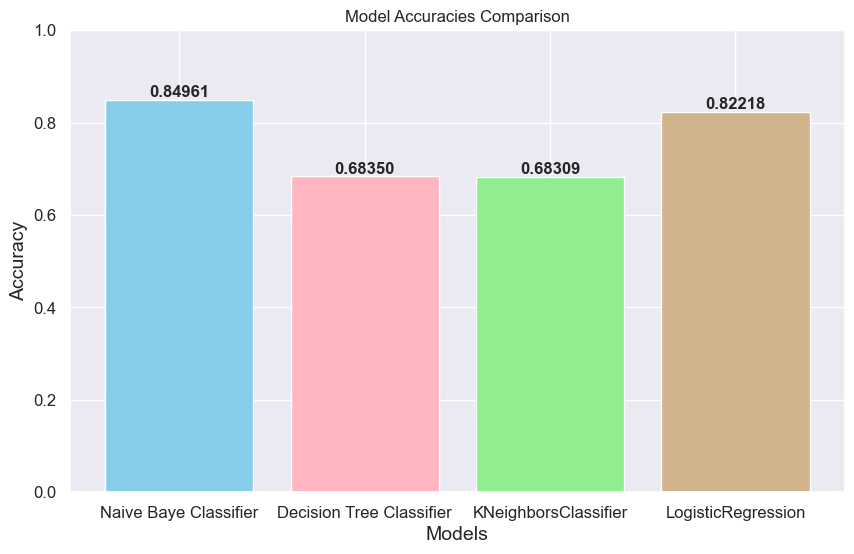

In [38]:
# Evaluates models on the test set to check how well they perform on unseen data, without cross-validation.
model_names = []
accuracies = []

# Define colors for the bars
colors = ['#87CEEB', '#FFB6C1', '#90EE90', '#D2B48C']

for i, v in models:
    # Calculate accuracy, confusion matrix, and classification report
    accuracy = metrics.accuracy_score(y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(y_test, v.predict(X_test))
    classification = metrics.classification_report(y_test, v.predict(X_test))

    # Store the accuracy and model name
    model_names.append(i)
    accuracies.append(accuracy)

    # Print model evaluation results
    print()
    print('============================== {} {} Model Test Results =============================='.format(grpclass, i))
    print()
    print("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification)
    print()

# Plot the bar chart for model accuracies
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color=colors)

# Add accuracy values above bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{acc:.5f}", 
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies Comparison')
plt.ylim(0, 1)  # Set y-axis to be between 0 and 1 for accuracy
plt.show()
